# Data Cleaning e.g. - chat history

### ⚠⚠⚠ATTENTION：This project is not created for any religious purposes, nor does the chat history content represent the author's own stance or point of views in any aspects. Therefore, please BE OPEN-MINDED & OBJECTIVE with the contents without taking anything personal. 
### Questions,

#### Q1. What were the peak hours & days of the week people have frequently sent messages in the group? 

#### Q2. What were the most common keywords in chat messages within peak hours & days of the week & what were their rates of appearances?

#### Q3. What were the message count message length (word counts) per person by month? & what were the average word counts per message?

#### Q4. Was there any correlation between message count & message length?

#### Q5. Was there any correlation between average word counts per message & common keywords? i.e. would users who have sent the longer messages tended to use more common keywords?

In [ ]:
# import packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# when working with chinese words, solves encoding prob.
plt.rcParams['font.sans-serif'] = ['SimHei']
# solves graphs axes negative signs prob.
plt.rcParams['axes.unicode_minus'] = False 

## 1. Read and manage data

In [2]:
# default encoding type = 'cp936', i.e. gb2312 format
# open with 'with', fill will close without needing you to use 'close' command
file_to_be_read='WhatsApp Chat with Big Family - processed.txt'
with open(file_to_be_read,mode='r',encoding='utf-8-sig') as file:
    data=file.read()

In [3]:
data[:300]

'23/10/21, 15:50 - Ja**y: <Media omitted>\n23/10/21, 15:50 - Ja**y: VID-20211023-WA0022.mp4 (file attached)\n23/10/21, 15:52 - +852 90** **85: 嘩一家大小去吊佢返屋企咀佢😋😋\n23/10/21, 15:53 - +852 90** **85: 記住带爺爺同我去吊魚呀😉\n23/10/21, 17:17 - Wi**: 嘩，好大條魚啊🐠！豐富的收穫👏🏻👏🏻\n23/10/21, 17:22 - +852 91** **44: 青衣仔要清蒸后，攤凍肉質才實，好味\n23'

In [4]:
# split by '\n', and make data into a list
data1 = data.split('\n')

In [5]:
len(data1)

358

In [6]:
# check appearance of data1
# can come back & change 'start' & 'end' variables for use in later stages
start=85
end=95
data1[start:end]

['23/12/21, 16:06 - +852 90** **85: <Media omitted>',
 '23/12/21, 16:10 - Mum: Yuen Y，今天天氣郊遊最合宜。👍👍',
 '23/12/21, 16:11 - +852 90** **85: PTT-20211223-WA0000.opus (file attached)',
 '23/12/21, 16:17 - Mum: 非常好！👏👏',
 '23/12/21, 16:42 - +852 98** **07: 😆咁叻～',
 '23/12/21, 17:03 - +852 90** **85: <Media omitted>',
 '23/12/21, 17:03 - +852 90** **85: <Media omitted>',
 '23/12/21, 17:03 - +852 90** **85: <Media omitted>',
 '23/12/21, 17:06 - Wi**: Uncle、Auntie親親大自然🌳🌲☘️🍀🌿🌱，身心舒暢😌👫',
 '23/12/21, 17:15 - +852 90** **85: 🥰🥰']

In [ ]:
'''
# extract all non-empty contents starting with dates, 
# may be useful for other untidy data but not in this case
content=[]

# for i in data1:
#     after_strip=i.strip()
#     if after_strip=='':
#         continue
#     content.append(after_strip)
    
for i,j in enumerate(data1):
    after_strip=j.strip() # same as strip() function in excel
    if after_strip=='': # filter empty rows
        continue
    content.append(after_strip)
'''

In [ ]:
'''
# check uncertified rows
n=0 # row no.
for i in data1:
    if i.strip()=='':
        n=n+1
        print(i)
        print('*'*10)
'''

## 2. Extract dates, usernames, chat content respectively

In [7]:
# find desired slicing position of strings
char=' - '
slice_a=data1[start].find(char)
slice_b=data1[end].rfind(char)+len(char)
print(slice_a)
print(slice_b)

15
18


In [8]:
# split rows into date&time & subset for name
date_time=[i.split(': ')[0][:slice_a]for i in data1]
name=[i.split(': ')[0][slice_b:]for i in data1]
chat=[i.split(': ')[1:] for i in data1]

In [9]:
print(len(date_time))
print(len(name))
print(len(chat))

358
358
358


In [10]:
# check results
display(date_time[start:end],name[start:end],chat[start:end])

['23/12/21, 16:06',
 '23/12/21, 16:10',
 '23/12/21, 16:11',
 '23/12/21, 16:17',
 '23/12/21, 16:42',
 '23/12/21, 17:03',
 '23/12/21, 17:03',
 '23/12/21, 17:03',
 '23/12/21, 17:06',
 '23/12/21, 17:15']

['+852 90** **85',
 'Mum',
 '+852 90** **85',
 'Mum',
 '+852 98** **07',
 '+852 90** **85',
 '+852 90** **85',
 '+852 90** **85',
 'Wi**',
 '+852 90** **85']

[['<Media omitted>'],
 ['Yuen Y，今天天氣郊遊最合宜。👍👍'],
 ['PTT-20211223-WA0000.opus (file attached)'],
 ['非常好！👏👏'],
 ['😆咁叻～'],
 ['<Media omitted>'],
 ['<Media omitted>'],
 ['<Media omitted>'],
 ['Uncle、Auntie親親大自然🌳🌲☘️🍀🌿🌱，身心舒暢😌👫'],
 ['🥰🥰']]

## !!. Further processing on usernames
#### !!!!!!!!!!!!! just to show case knowledge, for privacy reason, have completed processing in somewhere else rather than here

In [ ]:
'''
name_sen=[]
for i in name:
    if len(i)==14: # HK no.
        j=i.replace(i[7:12],'** **')
    elif len(i)==4 or len(i)==5: # names
        j=i.replace(i[2:4],'**')
    elif len(i)==17: # Mainland China no.
        j=i.replace(i[6:14],'* **** *')
    elif len(i)==15: # AU no.
        j=i.replace(i[6:13],'* *** *')
    elif len(i)==12: # a special case
        j=i.replace(i[3:10],'**** **')
    else: # see if anything missed
        j=i
    name_sen.append(j)
'''

## 3. Create DataFrame for date, usernames & chat contents

In [11]:
# make dataframe using 3 lists, either way
# df_chat=pd.DataFrame([date_time,name,chat],index=['Date & Time','Username','Message Content']).T
df_chat=pd.DataFrame({'Date & Time':date_time,'Username':name,'Message Content':chat})

In [12]:
df_chat[start:end]

,Date & Time,Username,Message Content
85,"23/12/21, 16:06",+852 90** **85,[<Media omitted>]
86,"23/12/21, 16:10",Mum,[Yuen Y，今天天氣郊遊最合宜。👍👍]
87,"23/12/21, 16:11",+852 90** **85,[PTT-20211223-WA0000.opus (file attached)]
88,"23/12/21, 16:17",Mum,[非常好！👏👏]
89,"23/12/21, 16:42",+852 98** **07,[😆咁叻～]
90,"23/12/21, 17:03",+852 90** **85,[<Media omitted>]
91,"23/12/21, 17:03",+852 90** **85,[<Media omitted>]
92,"23/12/21, 17:03",+852 90** **85,[<Media omitted>]
93,"23/12/21, 17:06",Wi**,[Uncle、Auntie親親大自然🌳🌲☘️🍀🌿🌱，身心舒暢😌👫]
94,"23/12/21, 17:15",+852 90** **85,[🥰🥰]


## 4. Data Manipulation & Exploratory Analysis

In [13]:
display(df_chat.info(),df_chat.shape,df_chat.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date & Time      358 non-null    object
 1   Username         358 non-null    object
 2   Message Content  358 non-null    object
dtypes: object(3)
memory usage: 8.5+ KB


None

(358, 3)

Date & Time        0
Username           0
Message Content    0
dtype: int64

In [14]:
# frequency of users
df_chat['Username'].value_counts()

+86 13* **** *929    63
+852 90** **85       60
+852 93** **27       55
Mum                  48
Wi**                 42
+61 41* *** *24      28
Ja**y                28
+852 98** **07       17
+852 91** **44       13
Emi**** **de          3
Emi**** **de left     1
Name: Username, dtype: int64

In [15]:
# Convert 'Date & Time' column into 'datetime' format, and rearrange it with strftime, 
# but will become 'object' type again, will need to convert it into 'datetime' format again
import datetime as dt
strfttime_format1='%A %d/%m/%Y %H:%M:%S'
df_chat['Date & Time']=pd.to_datetime(df_chat['Date & Time'])
df_chat['Date & Time']=df_chat['Date & Time'].apply(lambda x: x.strftime(strfttime_format1))

In [16]:
df_chat['Date & Time'].loc[252]

'Friday 02/12/2022 10:14:00'

In [17]:
df_chat.sample(8)

,Date & Time,Username,Message Content
334,Sunday 27/02/2022 07:40:00,+852 93** **27,[2022年2月27日 邦聞 （靈修分享） 【詩10:1】耶和華啊，你為甚麼站在遠處？在患難...
8,Saturday 23/10/2021 18:45:00,+61 41* *** *24,[<Media omitted>]
157,Thursday 20/01/2022 09:44:00,Wi**,[呢兩日攰唔攰呀，Gab.C？有無唔舒服呢？]
222,Saturday 02/04/2022 15:12:00,+86 13* **** *929,[🙏🙏🙏]
29,Tuesday 26/10/2021 15:31:00,+852 98** **07,"[<Media omitted> 多謝YuYuee, 劉公公和婆婆]"
130,Friday 01/07/2022 15:49:00,+852 90** **85,[<Media omitted>]
171,Sunday 23/01/2022 08:12:00,Mum,[🙏🙏]
118,Thursday 30/12/2021 18:31:00,Ja**y,[Yes😊]


In [18]:
# Convert 'Date & Time' column into 'datetime' format again, in desired '%Y/%m/%d %H:%M:%S' format
strfttime_format2='%Y/%m/%d %H:%M:%S'
df_chat['Date & Time']=pd.to_datetime(df_chat['Date & Time'])
df_chat['Date & Time']=df_chat['Date & Time'].apply(lambda x: x.strftime(strfttime_format2))
df_chat['Date & Time']=pd.to_datetime(df_chat['Date & Time'])

In [19]:
# '2022-02-12' wiill become '2022-12-02' without cconvertion, due to 'auto-americanisation' setting....
df_chat['Date & Time'].loc[252]

Timestamp('2022-02-12 10:14:00')

In [20]:
# set 'Date & Time' column as index
df_chat1=df_chat.copy()
df_chat1.index=df_chat1['Date & Time']
df_chat1.drop(['Date & Time'],axis=1,inplace=True)

In [21]:
df_chat1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 358 entries, 2021-10-23 15:50:00 to 2022-03-02 19:05:00
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Username         358 non-null    object
 1   Message Content  358 non-null    object
dtypes: object(2)
memory usage: 8.4+ KB


In [22]:
df_chat1.iloc[end]

Username           +86 13* **** *929
Message Content              [👏👍🏻💪😁]
Name: 2021-12-23 19:51:00, dtype: object

### 4.1 Monthly message counts
#### Brief review of distributions

In [23]:
# to explore monthly counts of chats
df_chat2=df_chat1.resample('M',convention='start').count()
df_chat2

,Username,Message Content
Date & Time,,
2021-10-31,32,32
2021-11-30,20,20
2021-12-31,72,72
2022-01-31,76,76
2022-02-28,149,149
2022-03-31,9,9


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


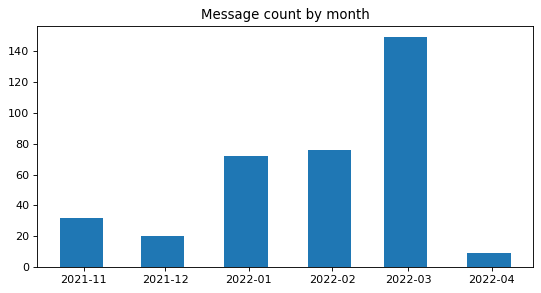

In [24]:
# plot monthly frequencies of chats
plt.figure(figsize=(8,4),dpi=80)
plt.bar(df_chat2.index, df_chat2['Message Content'], width=16)
plt.title('Message count by month')
plt.show()

## Q1. What were the peak hours & days of the week people have frequently sent messages in the group?

### 4.2 Message counts by Hours & Day of the week respectively

In [25]:
# create new columns 'Hours' & 'Day of the week' from 'Date & Time' column, 
# work out corresponding frequencies
df_chat1['Hours']=df_chat1.index
df_chat1['Hours']=df_chat1['Hours'].dt.strftime('%H')

In [26]:
df_chat1['Day of the week']=df_chat1.index
df_chat1['Day of the week']=df_chat1['Day of the week'].apply(lambda x: x.strftime('%A'))

In [27]:
df_chat1.sample(8)

,Username,Message Content,Hours,Day of the week
Date & Time,,,,
2021-10-23 18:45:00,+61 41* *** *24,[<Media omitted>],18,Saturday
2022-02-18 09:18:00,+86 13* **** *929,[🙏🙏🙏],09,Friday
2022-02-26 09:45:00,+852 93** **27,[2022年2月26日 邦聞（靈修分享） 【詩9:1】我要一心稱謝耶和華，傳揚你一切奇妙的作...,09,Saturday
2021-12-02 10:31:00,+852 90** **85,[Seb.CGab.C表演D乜野項目😍],10,Thursday
2022-02-25 09:23:00,Wi**,[<Media omitted>],09,Friday
2022-01-22 19:41:00,Wi**,[謝謝邦分享😀],19,Saturday
2022-02-05 16:05:00,Mum,[🙏🙏],16,Saturday
2022-02-13 14:01:00,Mum,[🙏👍],14,Sunday


In [28]:
# create a dataframe that shows message count by hour
hour_msg_count=df_chat1.groupby(['Hours'],as_index=False)['Message Content'].count()
hour_msg_count.rename(columns={'Message Content':'Message count'}, inplace=True)

In [29]:
# create a dataframe that shows message count by day of the week & user
week_user_msg_count=df_chat1.groupby(['Day of the week','Username'],as_index=False)['Message Content'].count()
week_user_msg_count.rename(columns={'Message Content':'Message count'}, inplace=True)

In [30]:
# check message counts by day of the week
week_user_msg_count.pivot_table(index=['Day of the week'],values=['Message count'],aggfunc='sum')

,Message count
Day of the week,
Friday,48
Monday,35
Saturday,70
Sunday,38
Thursday,84
Tuesday,45
Wednesday,38


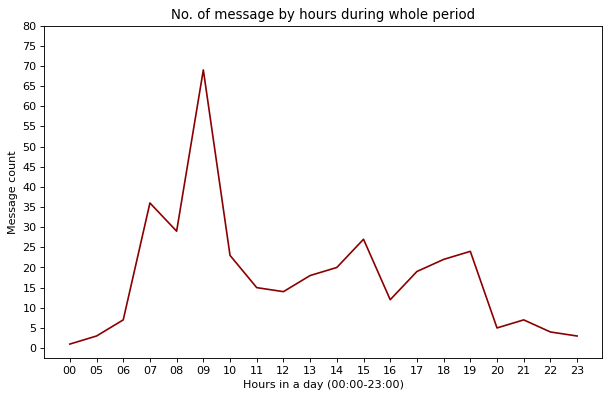

In [31]:
# plot no. of message by hours
plt.figure(figsize=(9,5.5),dpi=80)
plt.plot(hour_msg_count['Hours'],hour_msg_count['Message count'],color='darkred')
plt.title('No. of message by hours during whole period')
plt.yticks([i * 5 for i in range(0, 17)])
plt.xlabel('Hours in a day (00:00-23:00)')
plt.ylabel('Message count')
plt.show()

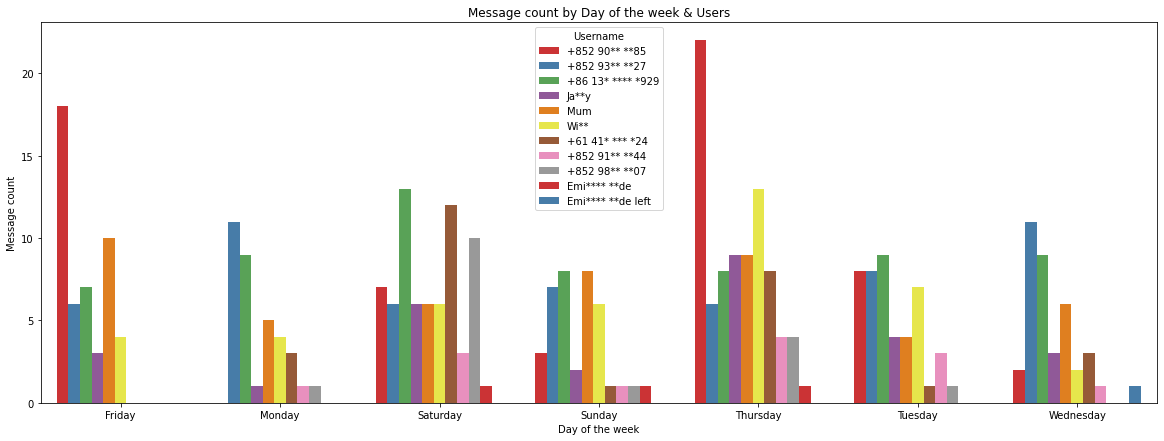

In [32]:
# plot distributions of message by days of the week
fig, ax = plt.subplots(figsize=(20,7))
ax. set_title("Message count by Day of the week & Users")
g=sns.barplot(x='Day of the week',y='Message count',hue='Username',data=week_user_msg_count,palette='Set1')

In [33]:
# seems that people were active during 8am - 10am or on thursdays & saturdays (peak periods)
# let's see how many messages were sent during the specified periods
time_slot_wanted=['08','09','10']
days_wanted=['Thusday','Saturday']
df_chat_peak=df_chat1[df_chat1['Hours'].isin(time_slot_wanted)|df_chat1['Day of the week'].isin(days_wanted)]

print(f'{round(df_chat_peak.shape[0]/df_chat1.shape[0],4)*100}% of messages were sent at hours: {time_slot_wanted} & on {days_wanted}.')
print(f'With {df_chat_peak.shape[0]} rows in total.')

48.32% of messages were sent at hours: ['08', '09', '10'] & on ['Thusday', 'Saturday'].
With 173 rows in total.


In [34]:
df_chat_peak.sample(8)

,Username,Message Content,Hours,Day of the week
Date & Time,,,,
2022-02-26 15:54:00,+852 90** **85,[5座都嚴重85宗確診24户無應門7宗末確出入都要小心呀😛],15,Saturday
2022-02-25 09:48:00,+852 93** **27,[2022年2月25日 邦聞（靈修分享） 【詩8:2】你因敵人的緣故，從孩童和吃奶的口中建立...,09,Friday
2022-02-07 09:31:00,+852 93** **27,[2022年2月7日 邦聞（靈修分享） 【詩9:9】耶和華要作受欺壓者的庇護所，在患難時的庇...,09,Monday
2022-01-19 09:22:00,Ja**y,[<Media omitted>],09,Wednesday
2022-02-19 08:48:00,+852 93** **27,[2022年2月19日 邦聞 （靈修分享） 【詩2:12】當親吻兒子，免得他發怒，你們就在半...,08,Saturday
2022-01-29 17:33:00,Mum,[🙏🙏],17,Saturday
2022-02-20 08:02:00,Mum,[🙏🙏禱告是我們得力量的源頭。],08,Sunday
2021-12-02 10:30:00,+852 90** **85,[食呀食呀好開心],10,Thursday


## Q2. What were the most common keywords in chat messages within peak hours & days of the week & what were their rates of appearances?

#### 4.2.1 Common keywords of corresponding chat messages & their rates of appearances

In [35]:
# extract all content into a variable
# load user's dictionary & cut chinese words more customisably with package - jieba
import jieba
# can manually adjust repeatedly, to increase accuracy
jieba.load_userdict('WhatsApp Chat with Big Family - Dict.txt') 

peak_content=''
for i in df_chat_peak['Message Content']:
    for j in i:
        j=j.strip()
        peak_content+=' '.join(jieba.cut(j))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\acer\AppData\Local\Temp\jieba.cache
Loading model cost 1.991 seconds.
Prefix dict has been built successfully.


In [36]:
peak_content[:300]

'< Media   omitted >VID - 20211023 - WA0022 . mp4   ( file   attached )嘩 一家 大小 去 吊 佢 返 屋企 咀 佢 😋 😋記住 带爺 爺同 我 去 吊魚 呀 😉嘩 ， 好大 條魚 啊 🐠 ！ 豐富 的 收 穫 👏 🏻 👏 🏻青衣 仔要 清蒸 后 ， 攤凍 肉質 才實 ， 好味Seb . C ， Gab . C 好 叻 ！ 😁 👍 🏻 💪< Media   omitted >< Media   omitted >< Media   omitted >< Media   omitted >好好 味 。 青衣 仔食 左末 ？我錫 '

In [ ]:
# install package "wordcloud"
# !pip install wordcloud

In [37]:
# generate keywords with wordcloud
from wordcloud import WordCloud

In [38]:
# path of the font
font=r'C:/Windows/Fonts/msyh.ttc'
# generate wordcloud image
wc1=WordCloud(font_path=font,width=1400,height=1050, mode='RGBA',background_color='white').generate(text=peak_content)
wc1

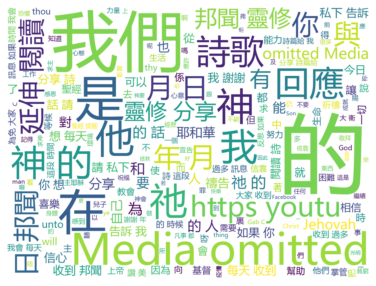

In [39]:
# display the wordcloud image
plt.figure(figsize=(8,5))
wc1.to_file('Chat_wc01.png')
plt.imshow(wc1,interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
# refer to above wordcloud, use the 'stopwords' variable to filterout meaningless conjunctions/prepositions
# can discover & add more 'stopwords' manually into the .txt file when necessary
with open('WhatsApp Chat with Big Family - stopwords.txt',mode='r',encoding='utf-8-sig') as file:
    stopwords=file.read().splitlines()

In [41]:
wc2=WordCloud(font_path=font,width=1400,height=1050, mode='RGBA',stopwords=stopwords,background_color='white').generate(text=peak_content)
wc2

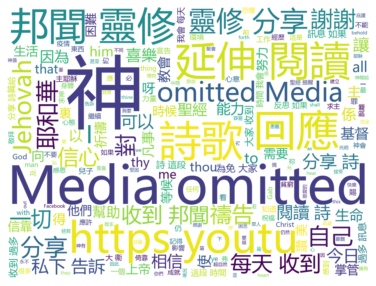

In [42]:
plt.figure(figsize=(8,5))
wc2.to_file('Chat_wc02.png')
plt.imshow(wc2,interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
# choose any keyword from wordcloud & add some others manually
kw_list=['youtu.be','靈修','邦聞','🙏','🤣','詩歌','Media omitted','2022','回應','分享','神']

df_chat_peak['Message Content']=df_chat_peak['Message Content'].astype(str)
print(f'During hours {time_slot_wanted} or {days_wanted}, there were {df_chat_peak.shape[0]} messages sent, where \n')

for kw in kw_list:
    kw_len=len(df_chat_peak[df_chat_peak['Message Content'].str.contains(kw)])
    print(f'{round(kw_len/df_chat_peak.shape[0]*100,2)}% of messages containing "{kw}", i.e. {kw_len} in total. \n')

During hours ['08', '09', '10'] or ['Thusday', 'Saturday'], there were 173 messages sent, where 

13.29% of messages containing "youtu.be", i.e. 23 in total. 

12.14% of messages containing "靈修", i.e. 21 in total. 

12.14% of messages containing "邦聞", i.e. 21 in total. 

39.31% of messages containing "🙏", i.e. 68 in total. 

2.31% of messages containing "🤣", i.e. 4 in total. 

12.72% of messages containing "詩歌", i.e. 22 in total. 

20.81% of messages containing "Media omitted", i.e. 36 in total. 

13.29% of messages containing "2022", i.e. 23 in total. 

11.56% of messages containing "回應", i.e. 20 in total. 

13.29% of messages containing "分享", i.e. 23 in total. 

15.61% of messages containing "神", i.e. 27 in total. 



<ipython-input-43-205cb1383b95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chat_peak['Message Content']=df_chat_peak['Message Content'].astype(str)


#### It seems like '靈修', '邦聞', 'youtu.be', ' Media omitted', '🙏' & '2022'  are the most common keywords during the "peak periods". 
#### we will see if these keywords were also common in the below scenarios

### 4.3 Message counts & word counts by month per user

In [44]:
# create new column - year+month
df_chat1['Month']=df_chat1.index
df_chat1['Month']=df_chat1['Month'].dt.strftime('%Y-%m')

In [45]:
df_chat1.iloc[:20]['Message Content']

Date & Time
2021-10-23 15:50:00                            [<Media omitted>]
2021-10-23 15:50:00    [VID-20211023-WA0022.mp4 (file attached)]
2021-10-23 15:52:00                            [嘩一家大小去吊佢返屋企咀佢😋😋]
2021-10-23 15:53:00                               [記住带爺爺同我去吊魚呀😉]
2021-10-23 17:17:00                         [嘩，好大條魚啊🐠！豐富的收穫👏🏻👏🏻]
2021-10-23 17:22:00                          [青衣仔要清蒸后，攤凍肉質才實，好味]
2021-10-23 17:38:00                         [Seb.C，Gab.C好叻！😁👍🏻💪]
2021-10-23 18:45:00                            [<Media omitted>]
2021-10-23 18:45:00                            [<Media omitted>]
2021-10-23 18:45:00                            [<Media omitted>]
2021-10-23 18:45:00                            [<Media omitted>]
2021-10-23 18:55:00                                [好好味。青衣仔食左末？]
2021-10-23 18:56:00                 [我錫你呀Seb.CGab.C嫲嫲想咬你一啖好味過條魚]
2021-10-23 19:00:00                                   [青衣仔係受保護㗎]
2021-10-23 19:00:00                                      [唔拎得上嚟]
2021-10-23 19

#### 4.3.1 Replace strings - 'Media omitted' & '(file attached)' & create new column for word counts(message length)

In [46]:
# create new column - Message length, to show how many words each message had
# before that, replace '['<Media omitted>']' & '(file attached)' by '@' as they are meanlingless to word counts
replace_content1='<Media omitted>'
replace_content2='(file attached)'

df_chat1['Message Content']=df_chat1['Message Content'].astype(str)
df_chat1['Message Content']=df_chat1['Message Content'].str.replace(replace_content1,'@')
df_chat1['Message Content']=df_chat1['Message Content'].str.replace(replace_content2,'@')
# after replacement, create new column
df_chat1['Message length (Words)']=df_chat1['Message Content'][:].str.len()

In [47]:
df_chat1.iloc[:12][['Username','Message Content','Message length (Words)']]

,Username,Message Content,Message length (Words)
Date & Time,,,
2021-10-23 15:50:00,Ja**y,['@'],5
2021-10-23 15:50:00,Ja**y,['VID-20211023-WA0022.mp4 (@)'],31
2021-10-23 15:52:00,+852 90** **85,['嘩一家大小去吊佢返屋企咀佢😋😋'],19
2021-10-23 15:53:00,+852 90** **85,['記住带爺爺同我去吊魚呀😉'],16
2021-10-23 17:17:00,Wi**,['嘩，好大條魚啊🐠！豐富的收穫👏🏻👏🏻'],22
2021-10-23 17:22:00,+852 91** **44,['青衣仔要清蒸后，攤凍肉質才實，好味'],21
2021-10-23 17:38:00,+86 13* **** *929,['Seb.C，Gab.C好叻！😁👍🏻💪'],22
2021-10-23 18:45:00,+61 41* *** *24,['@'],5
2021-10-23 18:45:00,+61 41* *** *24,['@'],5


In [48]:
# ensure all messages contained '['<Media omitted>']' & '(file attached)' are all replaced
# BOTH DATAFRAMES HAVE TO BE EMPTY
display(df_chat1[df_chat1['Message Content'].str.contains(replace_content1)],
        df_chat1[df_chat1['Message Content'].str.contains(replace_content2)])

C:\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Username,Message Content,Hours,Day of the week,Month,Message length (Words)
Date & Time,,,,,,


,Username,Message Content,Hours,Day of the week,Month,Message length (Words)
Date & Time,,,,,,


## Q3. What were the message count message length (word counts) per person by month? & what were the average word counts per message?

#### 4.3.2 Visualisations & comparison for "message count by month & user" & "word counts(message length) by month & user" respectively

In [49]:
# check & ensure desired dtypes
df_chat1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 358 entries, 2021-10-23 15:50:00 to 2022-03-02 19:05:00
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Username                358 non-null    object
 1   Message Content         358 non-null    object
 2   Hours                   358 non-null    object
 3   Day of the week         358 non-null    object
 4   Month                   358 non-null    object
 5   Message length (Words)  358 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 19.6+ KB


In [50]:
# create a dataframe that shows message count by month & user
month_msg_count=df_chat1.groupby(['Month','Username'],as_index=False)['Message Content'].count()
month_msg_count.rename(columns={'Message Content':'Message count'}, inplace=True)

In [51]:
month_msg_count=pd.DataFrame(month_msg_count)

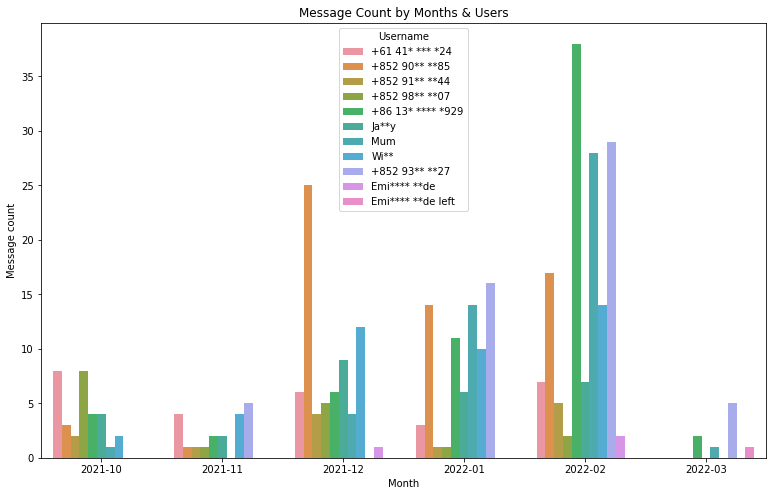

In [52]:
fig, ax = plt.subplots(figsize=(13,8))
ax. set_title("Message Count by Months & Users")
g=sns.barplot(x='Month',y='Message count',hue='Username',data=month_msg_count)

In [53]:
# create a dataframe that shows message length by month & user
month_msg_length=df_chat1.groupby(['Month','Username'],as_index=False)['Message length (Words)'].sum()

In [54]:
month_msg_length=pd.DataFrame(month_msg_length)

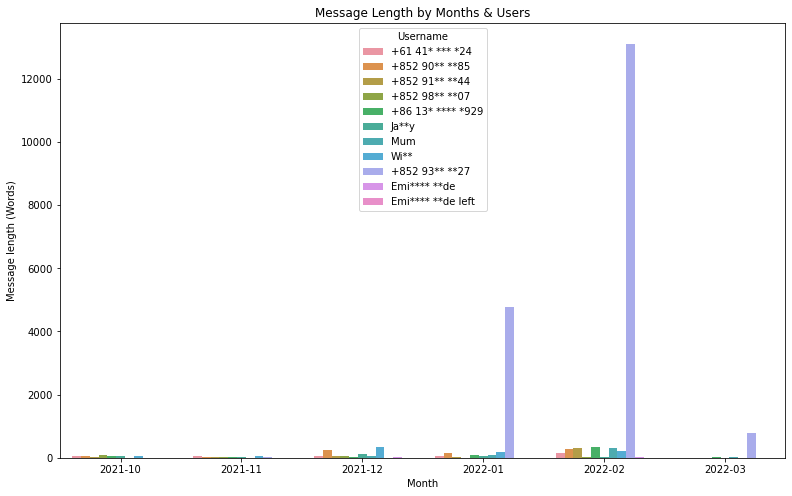

In [55]:
fig, ax = plt.subplots(figsize=(13,8))
ax. set_title("Message Length by Months & Users")
g=sns.barplot(x='Month',y='Message length (Words)',hue='Username',data=month_msg_length)

#### Users '+852 90.. ..85',	'+86 13. .... .929', '+852 93.. ..27' & 'Mum' were seemingly the most active users over the 6 month-period, but +852 93....27' has sent overwhelming amount of words compared to other users, especially in Feb 2022, 
#### we will examine if there would have been any correlation between common keywords & activities of users.

#### 4.3.3 Find correlations aong message counts, message length (word counts) & Average words per message
#### based on '80/20 rule'(or 'Pareto Principle'), refer to https://www.investopedia.com/terms/p/paretoprinciple.asp

In [56]:
# check if the row numbers & values of 'Month' columns of both DataFrame are the same or not.
print(month_msg_count.shape[0]==month_msg_length.shape[0],'\n\n',month_msg_count['Month']==month_msg_length['Month'])

True 

 0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
Name: Month, dtype: bool


In [57]:
# merge both DataFrames on columns 'Month' & 'Username'
month_msg_count_length=pd.merge(left=month_msg_count,right=month_msg_length,how='inner',left_on=['Month','Username'],right_on=['Month','Username'])

In [58]:
month_msg_count_length.head()

,Month,Username,Message count,Message length (Words)
0,2021-10,+61 41* *** *24,8,68
1,2021-10,+852 90** **85,3,65
2,2021-10,+852 91** **44,2,36
3,2021-10,+852 98** **07,8,100
4,2021-10,+86 13* **** *929,4,42


In [59]:
# Create new column, average words per message
month_msg_count_length['Average words per message']=month_msg_count_length['Message length (Words)']/month_msg_count_length['Message count']
month_msg_count_length['Average words per message']=month_msg_count_length['Average words per message'].apply(lambda x: round(x,2))

In [60]:
month_msg_count_length

,Month,Username,Message count,Message length (Words),Average words per message
0,2021-10,+61 41* *** *24,8,68,8.50
1,2021-10,+852 90** **85,3,65,21.67
2,2021-10,+852 91** **44,2,36,18.00
3,2021-10,+852 98** **07,8,100,12.50
4,2021-10,+86 13* **** *929,4,42,10.50
5,2021-10,Ja**y,4,50,12.50
6,2021-10,Mum,1,8,8.00
7,2021-10,Wi**,2,55,27.50
8,2021-11,+61 41* *** *24,4,44,11.00
9,2021-11,+852 90** **85,1,11,11.00


In [61]:
month_msg_count_length.corr()

,Message count,Message length (Words),Average words per message
Message count,1.000000,0.450588,0.376712
Message length (Words),0.450588,1.000000,0.944491
Average words per message,0.376712,0.944491,1.000000


In [62]:
month_msg_count_length.describe()

,Message count,Message length (Words),Average words per message
count,48.000000,48.000000,48.000000
mean,7.458333,472.208333,31.780833
std,8.235776,1986.231307,77.415040
min,1.000000,2.000000,2.000000
25%,2.000000,24.500000,7.875000
50%,4.500000,48.500000,11.790000
75%,9.250000,152.500000,18.250000
max,38.000000,13114.000000,452.210000


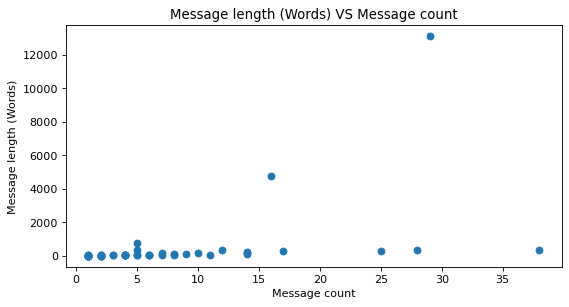

In [63]:
# Visualise the correlations on scatter plot
plt.figure(figsize=(8,4),dpi=80)
plt.scatter(month_msg_count_length['Message count'],month_msg_count_length['Message length (Words)'])
plt.title('Message length (Words) VS Message count')
plt.xlabel('Message count')
plt.ylabel('Message length (Words)')
plt.show()

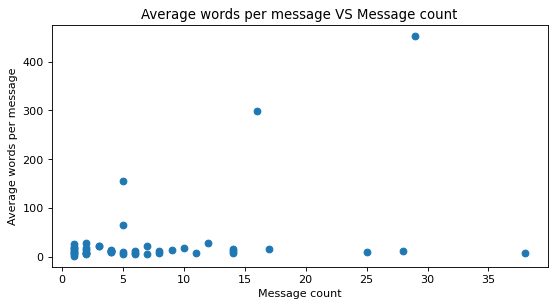

In [64]:
plt.figure(figsize=(8,4),dpi=80)
plt.scatter(month_msg_count_length['Message count'],month_msg_count_length['Average words per message'])
plt.title('Average words per message VS Message count')
plt.xlabel('Message count')
plt.ylabel('Average words per message')
plt.show()

## Q4. Was there any correlation between message count & message length?

#### From the correlation analysis, we can see that 
#### - there is an expected high correlation between "Average words per message" & "Message length (words)", the calculation of the former is obviously relational to the latter. (a message containing more words will have a higher average per message.)
#### - Hoever, there was no direct correlation between "Message count" & "Message length", which indicated that, users who were frequent sender (e.g. +86 13. .... .929) could tend to send short messages (possibly emojis & "good morning"s),  in contrast, other users (e.g. +852 93.. ..27) preferred to send long messages.

## Q5. Was there any correlation between average word counts per message & common keywords? i.e. would users who have sent the longer messages tended to use more common keywords?

#### 4.3.4 Find correlation between common keywords & top 20% rank

In [65]:
# based on '80/20 rule'(or 'Pareto Principle'), check top 20% Average words per message
top_pct=0.2
top_num=int(round(month_msg_count_length.shape[0]*top_pct,0))
month_msg_count_length.nlargest(top_num,'Average words per message')

,Month,Username,Message count,Message length (Words),Average words per message
37,2022-02,+852 93** **27,29,13114,452.21
28,2022-01,+852 93** **27,16,4770,298.12
44,2022-03,+852 93** **27,5,774,154.80
36,2022-02,+852 91** **44,5,321,64.20
24,2021-12,Wi**,12,344,28.67
7,2021-10,Wi**,2,55,27.50
10,2021-11,+852 91** **44,1,26,26.00
25,2022-01,+61 41* *** *24,3,67,22.33
1,2021-10,+852 90** **85,3,65,21.67
34,2022-02,+61 41* *** *24,7,148,21.14


#### Even though user +852 93** **27 has overwhemingly occupied the top 3 ranks, we will still examine as many as users as possible, specifically for percentages of their selected messages have contained the common keywords.
#### therefore,
#### - 2022-02	+852 93** **27
#### - 2022-02	+852 91** **44
#### - 2021-12	Wi**
#### - 2022-01	+61 41* *** *24
#### - 2021-10	+852 90** **85

In [66]:
# create new DataFrames for all 5 ranks
kw_list1=['靈修', '邦聞', 'youtu.be', '@', '🙏', '2022'] # '@' represents media/files, refer to replacement in earlier stages
kw_list1_combined= '|'.join(kw_list1)

# 2022-02　+852 93** **27
df_2022_02_93_27=df_chat1[(df_chat1['Username']=='+852 93** **27')&(df_chat1['Month']=='2022-02')]
df_2022_02_93_27_isin_kw=df_2022_02_93_27[df_2022_02_93_27['Message Content'].str.contains(kw_list1_combined)]

# 2022-02　+852 91** **44
df_2022_02_91_44=df_chat1[(df_chat1['Username']=='+852 91** **44')&(df_chat1['Month']=='2022-02')]
df_2022_02_91_44_isin_kw=df_2022_02_91_44[df_2022_02_91_44['Message Content'].str.contains(kw_list1_combined)]

# 2021-12　Wi**
df_2021_12_Wi=df_chat1[(df_chat1['Username']=='Wi**')&(df_chat1['Month']=='2021-12')]
df_2021_12_Wi_isin_kw=df_2021_12_Wi[df_2021_12_Wi['Message Content'].str.contains(kw_list1_combined)]

# 2022-01 +61 41* *** *24
df_2022_01_41_24=df_chat1[(df_chat1['Username']=='+61 41* *** *24')&(df_chat1['Month']=='2022-01')]
df_2022_01_41_24_isin_kw=df_2022_01_41_24[df_2022_01_41_24['Message Content'].str.contains(kw_list1_combined)]

# 2021-10　+852 90** **85
df_2021_10_90_85=df_chat1[(df_chat1['Username']=='+852 90** **85')&(df_chat1['Month']=='2021-10')]
df_2021_10_90_85_isin_kw=df_2021_10_90_85[df_2021_10_90_85['Message Content'].str.contains(kw_list1_combined)]

In [67]:
# show percentages of their selected messages have contained the common keywords.
print(f'In 2022-02, {round(df_2022_02_93_27_isin_kw.shape[0]/df_2022_02_93_27.shape[0]*100,2)} % of message sent by user +852 93** **27 contained 1 of the most common keywords.')
print(f'In 2022-02, {round(df_2022_02_91_44_isin_kw.shape[0]/df_2022_02_91_44.shape[0]*100,2)} % of message sent by user +852 91** **44 contained 1 of the most common keywords.')
print(f'In 2021-12, {round(df_2021_12_Wi_isin_kw.shape[0]/df_2021_12_Wi.shape[0]*100,2)} % of message sent by user Wi** contained 1 of the most common keywords.')
print(f'In 2022-01, {round(df_2022_01_41_24_isin_kw.shape[0]/df_2022_01_41_24.shape[0]*100,2)} % of message sent by user +61 41* *** *24 contained 1 of the most common keywords.')
print(f'In 2021-10, {round(df_2021_10_90_85_isin_kw.shape[0]/df_2021_10_90_85.shape[0]*100,2)} % of message sent by user +852 90** **85 contained 1 of the most common keywords.')

In 2022-02, 100.0 % of message sent by user +852 93** **27 contained 1 of the most common keywords.
In 2022-02, 40.0 % of message sent by user +852 91** **44 contained 1 of the most common keywords.
In 2021-12, 41.67 % of message sent by user Wi** contained 1 of the most common keywords.
In 2022-01, 33.33 % of message sent by user +61 41* *** *24 contained 1 of the most common keywords.
In 2021-10, 0.0 % of message sent by user +852 90** **85 contained 1 of the most common keywords.
